<a href="https://colab.research.google.com/github/AnggaraPS/BiGRU_Prediksi_Saham_TLKM/blob/main/BiGRU_Prediksi_Saham_TLKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Concatenate
from keras.layers import LSTM, GRU, Bidirectional, Input
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# **Read Data**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data
dataset = pd.read_csv('/content/drive/MyDrive/Skripsi LSTM dan GRU/TLKM.csv', parse_dates = ['Date'])
dataset.set_index('Date', inplace=True)
print(dataset)

              Open    High     Low   Close    Adj Close       Volume
Date                                                                
2014-07-25  2650.0  2680.0  2630.0  2650.0  1964.389282   79928300.0
2014-08-04  2690.0  2700.0  2590.0  2690.0  1994.040527  212200700.0
2014-08-05  2710.0  2725.0  2685.0  2710.0  2008.865723   97982300.0
2014-08-06  2655.0  2710.0  2650.0  2655.0  1968.095459   83111900.0
2014-08-07  2690.0  2695.0  2655.0  2690.0  1994.040527   80249800.0
...            ...     ...     ...     ...          ...          ...
2024-07-18  3260.0  3280.0  3190.0  3210.0  3210.000000   98903500.0
2024-07-19  3200.0  3210.0  3120.0  3140.0  3140.000000  138117200.0
2024-07-22  3180.0  3210.0  3090.0  3100.0  3100.000000  139383000.0
2024-07-23  3140.0  3160.0  3100.0  3160.0  3160.000000   74338000.0
2024-07-24  3140.0  3150.0  3040.0  3060.0  3060.000000   98752100.0

[2472 rows x 6 columns]


# **Data Understanding**

In [ ]:
dataset.shape

(2472, 6)

In [ ]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2472 entries, 2014-07-25 to 2024-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2471 non-null   float64
 1   High       2471 non-null   float64
 2   Low        2471 non-null   float64
 3   Close      2471 non-null   float64
 4   Adj Close  2471 non-null   float64
 5   Volume     2471 non-null   float64
dtypes: float64(6)
memory usage: 135.2 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2.471000e+03
mean,3681.052206,3719.291785,3642.397815,3680.295427,3008.689107,9.909391e+07
std,550.913509,552.528531,548.054054,551.756593,551.303725,6.622725e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,1937.268677,0.000000e+00
25%,3220.000000,3270.000000,3180.000000,3220.000000,2642.008545,6.136675e+07
50%,3790.000000,3820.000000,3750.000000,3780.000000,3011.145264,8.477690e+07
75%,4090.000000,4150.000000,4050.000000,4090.000000,3428.768066,1.181292e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4295.701172,1.155861e+09


# **Exploratory Data Analysis**

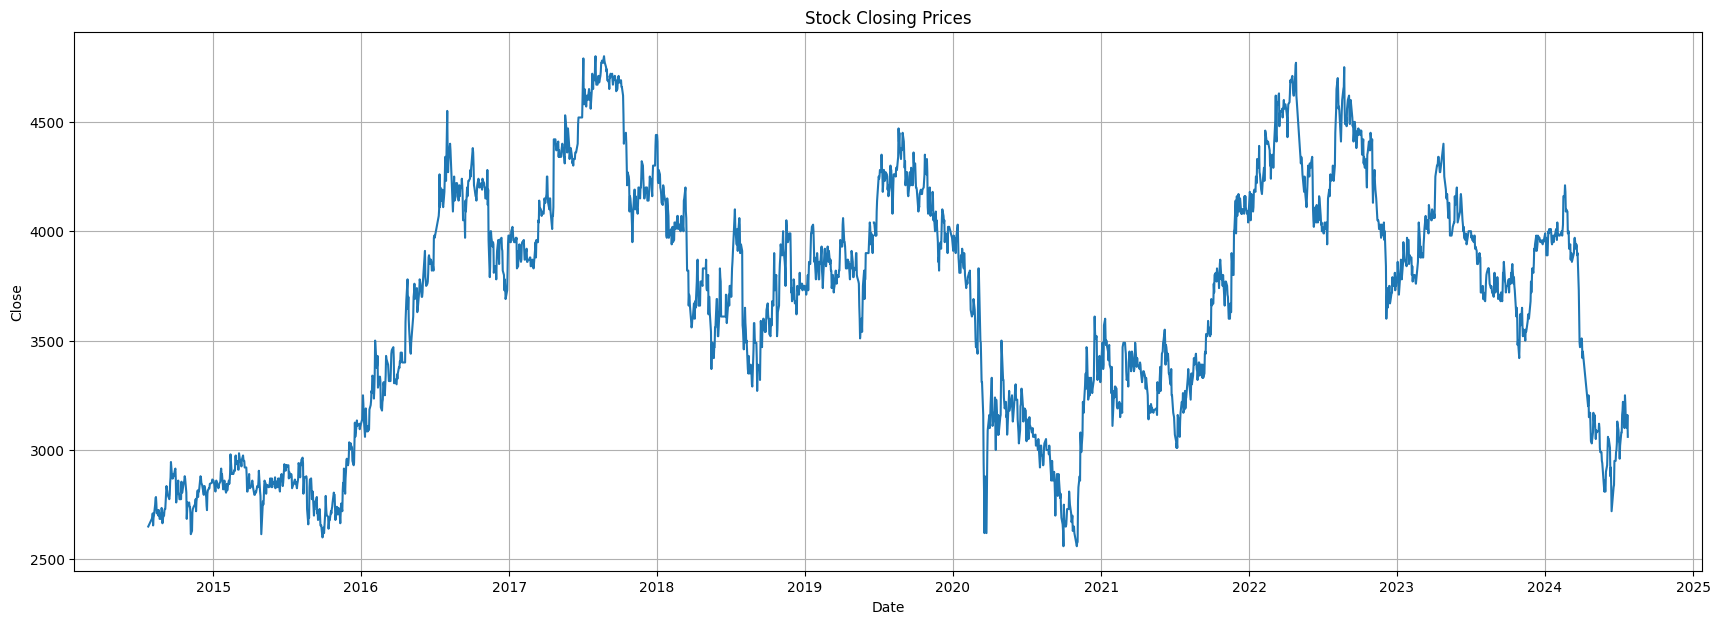

In [ ]:
plt.figure(figsize=(21, 7))
plt.plot(dataset['Close'])
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Open'])
plt.title('Stock Opening Prices')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['High'])
plt.title('Stock High Prices')
plt.xlabel('Date')
plt.ylabel('High')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Low'])
plt.title('Stock Low Prices')
plt.xlabel('Date')
plt.ylabel('Low')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Volume'])
plt.title('Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

plt.figure(figsize=(21, 7))
plt.plot(dataset['Adj Close'])
plt.title('Stock Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.grid(True)
plt.show()

# **Preprocessing Data**

## Data Cleaning

In [ ]:
dataset.isna().sum()

,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [ ]:
dataset[dataset.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


## Data Correlation

In [ ]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997242,0.997574,0.994914,0.884199,-0.055743
High,0.997242,1.000000,0.996599,0.997769,0.886575,-0.032297
Low,0.997574,0.996599,1.000000,0.997538,0.884199,-0.077229
Close,0.994914,0.997769,0.997538,1.000000,0.887247,-0.055129
Adj Close,0.884199,0.886575,0.884199,0.887247,1.000000,0.034657
Volume,-0.055743,-0.032297,-0.077229,-0.055129,0.034657,1.000000


## Data Reduction

In [ ]:
data = dataset.drop(columns=['Volume'])

# **Baseline Model**

## Train and Test Sets

In [ ]:
split_size = int(len(data) * 0.8)
train_data = data[:split_size]
test_data = data[split_size:]

## Data Normalization

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)
print('Train_scaled\n', train_scaled)
print('\nTest_scaled\n', test_scaled)

Train_scaled
 [[0.04347826 0.03982301 0.07725322 0.04017857 0.01219285]
 [0.06086957 0.04867257 0.06008584 0.05803571 0.02552343]
 [0.06956522 0.05973451 0.10085837 0.06696429 0.03218852]
 ...
 [0.67826087 0.67256637 0.66523605 0.64285714 0.7553664 ]
 [0.63478261 0.64159292 0.66523605 0.65178571 0.763498  ]
 [0.63913043 0.64159292 0.59656652 0.63839286 0.75130054]]

Test_scaled
 [[0.63478261 0.65486726 0.64377682 0.63839286 0.75130054]
 [0.65217391 0.6460177  0.65236052 0.65178571 0.763498  ]
 [0.64782609 0.6460177  0.6695279  0.66071429 0.77162961]
 ...
 [0.27391304 0.27433628 0.27467811 0.24107143 0.52273949]
 [0.25652174 0.25221239 0.27896996 0.26785714 0.54971422]
 [0.25652174 0.24778761 0.25321888 0.22321429 0.50475633]]


In [ ]:
train_scaled.shape, test_scaled.shape

((1976, 5), (495, 5))

## Sliding Window

In [ ]:
window_size = 14
features = 5

In [ ]:
def sliding_window (dataTLKM, timesteps):
    X = []
    Y = []

    for i in range(len(dataTLKM) - window_size + 1):
        dataX = dataTLKM[i:i + window_size, :]
        dataY = dataTLKM[i + window_size - 1, :]
        X.append(dataX)
        Y.append(dataY)

    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [ ]:
train_X, train_Y = sliding_window(train_scaled, window_size)
test_X, test_Y = sliding_window(test_scaled, window_size)


In [ ]:
test_X

array([[[0.63478261, 0.65486726, 0.64377682, 0.63839286, 0.70857253],
        [0.65217391, 0.6460177 , 0.65236052, 0.65178571, 0.7200763 ],
        [0.64782609, 0.6460177 , 0.6695279 , 0.66071429, 0.72774544],
        ...,
        [0.69130435, 0.72123894, 0.72532189, 0.73660714, 0.79293311],
        [0.72173913, 0.73893805, 0.74248927, 0.75892857, 0.81210603],
        [0.73478261, 0.7300885 , 0.74678112, 0.74553571, 0.80060226]],

       [[0.65217391, 0.6460177 , 0.65236052, 0.65178571, 0.7200763 ],
        [0.64782609, 0.6460177 , 0.6695279 , 0.66071429, 0.72774544],
        [0.65217391, 0.65044248, 0.66523605, 0.64732143, 0.71624178],
        ...,
        [0.72173913, 0.73893805, 0.74248927, 0.75892857, 0.81210603],
        [0.73478261, 0.7300885 , 0.74678112, 0.74553571, 0.80060226],
        [0.73478261, 0.73893805, 0.75965665, 0.75      , 0.80443688]],

       [[0.64782609, 0.6460177 , 0.6695279 , 0.66071429, 0.72774544],
        [0.65217391, 0.65044248, 0.66523605, 0.64732143, 0.7

In [ ]:
print('train_X',train_X.shape)
print('train_Y',train_Y.shape)

train_X (1963, 14, 5)
train_Y (1963, 5)


In [ ]:
print('train_X\n',train_X[0])
print('train_Y\n',train_Y[0])

train_X
 [[0.04347826 0.03982301 0.07725322 0.04017857 0.01149942]
 [0.06086957 0.04867257 0.06008584 0.05803571 0.02407186]
 [0.06956522 0.05973451 0.10085837 0.06696429 0.03035789]
 [0.04565217 0.05309735 0.08583691 0.04241071 0.01307088]
 [0.06086957 0.04646018 0.08798283 0.05803571 0.02407186]
 [0.06521739 0.05309735 0.10085837 0.0625     0.02721503]
 [0.08695652 0.07079646 0.11158798 0.08482143 0.04293044]
 [0.1        0.09070796 0.13304721 0.09821429 0.05235965]
 [0.10217391 0.09292035 0.13304721 0.10044643 0.05393116]
 [0.08913043 0.09070796 0.11802575 0.08705357 0.044502  ]
 [0.06956522 0.07300885 0.11158798 0.06696429 0.03035789]
 [0.07608696 0.07079646 0.11158798 0.07366071 0.03507273]
 [0.06521739 0.07522124 0.10300429 0.0625     0.02721503]
 [0.07608696 0.0619469  0.10300429 0.07366071 0.03507273]]
train_Y
 [0.07608696 0.0619469  0.10300429 0.07366071 0.03507273]


In [ ]:
print('test_X',test_X.shape)
print('test_Y',test_Y.shape)

test_X (482, 14, 5)
test_Y (482, 5)


In [ ]:
print('test_X\n',test_X[0])
print('test_Y\n',test_Y[0])

test_X
 [[0.49565217 0.53097345 0.53744493 0.55656109 0.609813  ]
 [0.54347826 0.53982301 0.56828194 0.53846154 0.59355521]
 [0.50434783 0.52654867 0.55066079 0.5520362  0.6057485 ]
 [0.53478261 0.53539823 0.56387665 0.53846154 0.59355521]
 [0.53043478 0.55309735 0.57268722 0.56561086 0.6179419 ]
 [0.54347826 0.53982301 0.55506608 0.52941176 0.58542632]
 [0.50869565 0.53097345 0.55506608 0.5520362  0.6057485 ]
 [0.52608696 0.53539823 0.57268722 0.53846154 0.59355521]
 [0.52173913 0.53539823 0.57268722 0.56108597 0.6138774 ]
 [0.53913043 0.57522124 0.5814978  0.58823529 0.63826419]
 [0.56086957 0.5619469  0.59911894 0.57013575 0.62200629]
 [0.54347826 0.54424779 0.55947137 0.54751131 0.60168411]
 [0.52173913 0.52212389 0.55506608 0.52036199 0.57729731]
 [0.51304348 0.53097345 0.56387665 0.55656109 0.609813  ]]
test_Y
 [0.51304348 0.53097345 0.56387665 0.55656109 0.609813  ]


In [ ]:
train_X.shape[1],train_X.shape[2]

(14, 5)

In [ ]:
train_Y.shape[1]

5

### BiGRU Method

In [ ]:
model_BiGRU = Sequential()
model_BiGRU.add(Bidirectional(GRU(64, activation='relu', return_sequences=True),
                              input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiGRU.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model_BiGRU.add(Bidirectional(GRU(64, activation='relu', return_sequences=False)))
model_BiGRU.add(Dropout(0.2))
model_BiGRU.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiGRU.compile(loss='mse', optimizer=optimizer)

history_BiGRU = model_BiGRU.fit(train_X, train_Y, epochs=50, batch_size=32, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0940 - val_loss: 0.0109
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0066 - val_loss: 0.0033
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0040 - val_loss: 7.3024e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0032 - val_loss: 8.5588e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0030 - val_loss: 6.0352e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 

In [ ]:
model_BiGRU2 = Sequential()
model_BiGRU2.add(Bidirectional(GRU(64, activation='relu', return_sequences=True),
                              input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiGRU2.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model_BiGRU2.add(Bidirectional(GRU(64, activation='relu', return_sequences=False)))
model_BiGRU2.add(Dropout(0.2))
model_BiGRU2.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiGRU2.compile(loss='mse', optimizer=optimizer)

history_BiGRU2 = model_BiGRU2.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - loss: 0.0858 - val_loss: 0.0102
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0088 - val_loss: 0.0086
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0053 - val_loss: 0.0016
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0032 - val_loss: 9.7271e-04
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms

In [ ]:
model_BiGRU3 = Sequential()
model_BiGRU3.add(Bidirectional(GRU(64, activation='relu', return_sequences=True),
                              input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiGRU3.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model_BiGRU3.add(Bidirectional(GRU(64, activation='relu', return_sequences=False)))
model_BiGRU3.add(Dropout(0.2))
model_BiGRU3.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiGRU3.compile(loss='mse', optimizer=optimizer)

history_BiGRU3 = model_BiGRU3.fit(train_X, train_Y, epochs=50, batch_size=64, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - loss: 0.1352 - val_loss: 0.0101
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0110 - val_loss: 0.0093
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0078 - val_loss: 0.0092
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0066 - val_loss: 0.0081
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0050 - val_loss: 0.0022
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0038 - val_loss: 7.9335e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0032 - val_loss: 8.7696e-04
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step

KeyboardInterrupt: 

In [ ]:
model_BiGRU4 = Sequential()
model_BiGRU4.add(Bidirectional(GRU(64, activation='relu', return_sequences=True),
                              input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiGRU4.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model_BiGRU4.add(Bidirectional(GRU(64, activation='relu', return_sequences=False)))
model_BiGRU4.add(Dropout(0.2))
model_BiGRU4.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiGRU4.compile(loss='mse', optimizer=optimizer)

history_BiGRU4 = model_BiGRU4.fit(train_X, train_Y, epochs=100, batch_size=64, verbose=1, validation_data=(test_X, test_Y))

In [ ]:
model_BiGRU5 = Sequential()
model_BiGRU5.add(Bidirectional(GRU(64, activation='relu', return_sequences=True),
                              input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiGRU5.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model_BiGRU5.add(Bidirectional(GRU(64, activation='relu', return_sequences=False)))
model_BiGRU5.add(Dropout(0.2))
model_BiGRU5.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiGRU5.compile(loss='mse', optimizer=optimizer)

history_BiGRU5 = model_BiGRU5.fit(train_X, train_Y, epochs=50, batch_size=128, verbose=1, validation_data=(test_X, test_Y))

In [ ]:
model_BiGRU6 = Sequential()
model_BiGRU6.add(Bidirectional(GRU(64, activation='relu', return_sequences=True),
                              input_shape=(train_X.shape[1], train_X.shape[2])))
model_BiGRU6.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model_BiGRU6.add(Bidirectional(GRU(64, activation='relu', return_sequences=False)))
model_BiGRU6.add(Dropout(0.2))
model_BiGRU6.add(Dense(train_Y.shape[1]))
optimizer = Adam(learning_rate=0.001)
model_BiGRU6.compile(loss='mse', optimizer=optimizer)

history_BiGRU6 = model_BiGRU6.fit(train_X, train_Y, epochs=100, batch_size=128, verbose=1, validation_data=(test_X, test_Y))

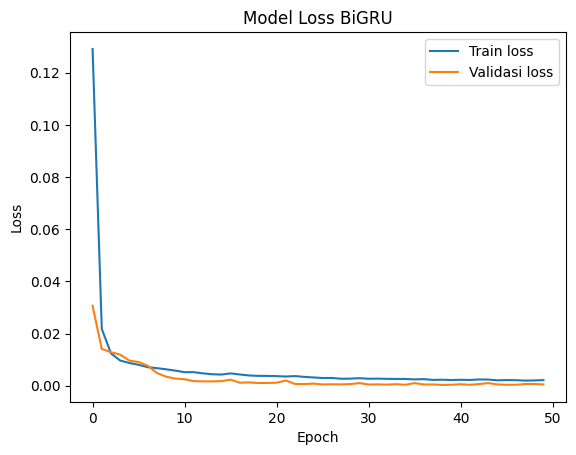

In [ ]:
plt.plot(history_BiGRU.history['loss'])
plt.plot(history_BiGRU.history['val_loss'])
plt.title('Model Loss BiGRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiGRU2.history['loss'])
plt.plot(history_BiGRU2.history['val_loss'])
plt.title('Model Loss BiGRU2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiGRU3.history['loss'])
plt.plot(history_BiGRU3.history['val_loss'])
plt.title('Model Loss BiGRU3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiGRU4.history['loss'])
plt.plot(history_BiGRU4.history['val_loss'])
plt.title('Model Loss BiGRU4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiGRU5.history['loss'])
plt.plot(history_BiGRU5.history['val_loss'])
plt.title('Model Loss BiGRU5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

plt.plot(history_BiGRU6.history['loss'])
plt.plot(history_BiGRU6.history['val_loss'])
plt.title('Model Loss BiGRU6')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validasi loss'], loc='upper right')
plt.show()

# **Evaluation Model**

## Prediction


In [ ]:
BiGRU_Save = '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiGRU_.h5'
# model_BiGRU.save(BiGRU_Save)

BiGRU_Save2 = '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiGRU_2.h5'
# model_BiGRU2.save(BiGRU_Save2)

BiGRU_Save3 = '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiGRU_3.h5'
# model_BiGRU3.save(BiGRU_Save3)

BiGRU_Save4 = '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiGRU_4.h5'
# model_BiGRU4.save(BiGRU_Save4)

BiGRU_Save5 = '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiGRU_5.h5'
# model_BiGRU5.save(BiGRU_Save5)

BiGRU_Save6 = '/content/drive/MyDrive/Skripsi LSTM dan GRU/BiGRU_6.h5'
# model_BiGRU6.save(BiGRU_Save6)

In [ ]:
loaded_model_BiGRU = tf.keras.models.load_model(BiGRU_Save, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiGRU2 = tf.keras.models.load_model(BiGRU_Save2, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiGRU3 = tf.keras.models.load_model(BiGRU_Save3, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiGRU4 = tf.keras.models.load_model(BiGRU_Save4, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiGRU5 = tf.keras.models.load_model(BiGRU_Save5, custom_objects={'mse': keras.losses.MeanSquaredError})
loaded_model_BiGRU6 = tf.keras.models.load_model(BiGRU_Save6, custom_objects={'mse': keras.losses.MeanSquaredError})

In [ ]:
pred_BiGRU = loaded_model_BiGRU.predict(test_X)
pred_BiGRU[-1,0]
pred_BiGRU2 = loaded_model_BiGRU2.predict(test_X)
pred_BiGRU2[-1,0]
pred_BiGRU3 = loaded_model_BiGRU3.predict(test_X)
pred_BiGRU3[-1,0]
pred_BiGRU4 = loaded_model_BiGRU4.predict(test_X)
pred_BiGRU4[-1,0]
pred_BiGRU5 = loaded_model_BiGRU5.predict(test_X)
pred_BiGRU5[-1,0]
pred_BiGRU6 = loaded_model_BiGRU6.predict(test_X)
pred_BiGRU6[-1,0]


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


0.277246

In [ ]:
print("prediction\n", pred_BiGRU)
print("\nPrediction Shape-",pred_BiGRU.shape)

prediction
 [[0.72846186 0.7420682  0.7479575  0.7473055  0.7827861 ]
 [0.7324414  0.74647343 0.75149494 0.7507242  0.7868031 ]
 [0.73169065 0.7458962  0.74975955 0.7485954  0.78679764]
 ...
 [0.28849    0.31498337 0.31644642 0.2951626  0.49533308]
 [0.28918016 0.31413373 0.31645584 0.29464749 0.49806625]
 [0.27100408 0.29389715 0.29679736 0.27419996 0.48313773]]

Prediction Shape- (482, 5)


In [ ]:
rmse = root_mean_squared_error(test_Y, pred_BiGRU)
mape = mean_absolute_percentage_error(test_Y, pred_BiGRU)
r = r2_score(test_Y, pred_BiGRU)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared Score:', r)

rmse2 = root_mean_squared_error(test_Y, pred_BiGRU2)
mape2 = mean_absolute_percentage_error(test_Y, pred_BiGRU2)
r2 = r2_score(test_Y, pred_BiGRU2)
print('\nMean Absolute Percentage Error (MAPE):', mape2)
print('Root Mean Squared Error (RMSE):', rmse2)
print('R-squared Score:', r2)

rmse3 = root_mean_squared_error(test_Y, pred_BiGRU3)
mape3 = mean_absolute_percentage_error(test_Y, pred_BiGRU3)
r3 = r2_score(test_Y, pred_BiGRU3)
print('\nMean Absolute Percentage Error (MAPE):', mape3)
print('Root Mean Squared Error (RMSE):', rmse3)
print('R-squared Score:', r3)

rmse4 = root_mean_squared_error(test_Y, pred_BiGRU4)
mape4 = mean_absolute_percentage_error(test_Y, pred_BiGRU4)
r4 = r2_score(test_Y, pred_BiGRU4)
print('\nMean Absolute Percentage Error (MAPE):', mape4)
print('Root Mean Squared Error (RMSE):', rmse4)
print('R-squared Score:', r4)

rmse5 = root_mean_squared_error(test_Y, pred_BiGRU5)
mape5 = mean_absolute_percentage_error(test_Y, pred_BiGRU5)
r5 = r2_score(test_Y, pred_BiGRU5)
print('\nMean Absolute Percentage Error (MAPE):', mape5)
print('Root Mean Squared Error (RMSE):', rmse5)
print('R-squared Score:', r5)

rmse6 = root_mean_squared_error(test_Y, pred_BiGRU6)
mape6 = mean_absolute_percentage_error(test_Y, pred_BiGRU6)
r6 = r2_score(test_Y, pred_BiGRU6)
print('\nMean Absolute Percentage Error (MAPE):', mape6)
print('Root Mean Squared Error (RMSE):', rmse6)
print('R-squared Score:', r6)

Mean Absolute Percentage Error (MAPE): 0.058029817139597394
Root Mean Squared Error (RMSE): 0.0286620948271112
R-squared Score: 0.9723346979847916

Mean Absolute Percentage Error (MAPE): 0.032875981154727
Root Mean Squared Error (RMSE): 0.01835059760344767
R-squared Score: 0.9886617877686475

Mean Absolute Percentage Error (MAPE): 0.041784932173791096
Root Mean Squared Error (RMSE): 0.023760181797055635
R-squared Score: 0.9741278451403229

Mean Absolute Percentage Error (MAPE): 0.027711452369237076
Root Mean Squared Error (RMSE): 0.01638877297308517
R-squared Score: 0.987023108098593

Mean Absolute Percentage Error (MAPE): 0.047296912566697095
Root Mean Squared Error (RMSE): 0.02770067373689753
R-squared Score: 0.9651675058555724

Mean Absolute Percentage Error (MAPE): 0.04718966348348052
Root Mean Squared Error (RMSE): 0.024991506562112097
R-squared Score: 0.9773954005023079


## Un-Normalize Data

In [ ]:
actual_unscaled = scaler.inverse_transform(test_Y)
actual_train_un = scaler.inverse_transform(train_Y)

In [ ]:
y_test = scaler.inverse_transform(test_Y)
y_train = scaler.inverse_transform(train_Y)

In [ ]:
def prediction(model):
    prediction = model.predict(test_X)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_BiGRU = prediction(loaded_model_BiGRU)
prediction_BiGRU


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[4225.4624, 4267.074 , 4192.741 , 4233.9644, 3783.4167],
       [4234.615 , 4277.03  , 4200.9834, 4241.622 , 3792.8906],
       [4232.888 , 4275.7256, 4196.9395, 4236.8535, 3792.8777],
       ...,
       [3213.527 , 3301.8623, 3187.32  , 3221.1643, 3105.4783],
       [3215.1143, 3299.9421, 3187.342 , 3220.0105, 3111.9243],
       [3173.3093, 3254.2075, 3141.5378, 3174.208 , 3076.7163]],
      dtype=float32)

In [ ]:
pred_unscaled_BiGRU = scaler.inverse_transform(pred_BiGRU)

In [ ]:
print("Actual_unscaled Values--\n " ,actual_unscaled)
print("\nPred_unscaled_GRU Values--\n " ,pred_unscaled_BiGRU)



Actual_unscaled Values--
  [[4240.       4240.       4190.       4230.       3825.435059]
 [4240.       4260.       4220.       4240.       3834.47876 ]
 [4240.       4250.       4190.       4250.       3843.522217]
 ...
 [3180.       3210.       3090.       3100.       3100.      ]
 [3140.       3160.       3100.       3160.       3160.      ]
 [3140.       3150.       3040.       3060.       3060.      ]]

Pred_unscaled_GRU Values--
  [[4225.4624 4267.074  4192.741  4233.9644 3783.4167]
 [4234.615  4277.03   4200.9834 4241.622  3792.8906]
 [4232.888  4275.7256 4196.9395 4236.8535 3792.8777]
 ...
 [3213.527  3301.8623 3187.32   3221.1643 3105.4783]
 [3215.1143 3299.9421 3187.342  3220.0105 3111.9243]
 [3173.3093 3254.2075 3141.5378 3174.208  3076.7163]]


In [ ]:
data_test = test_data[6:]
data_test.shape

(489, 5)

In [ ]:
train_data = train_data[6:]
train_data.shape

(1964, 5)

In [ ]:
names = ['Open', 'High', 'Low', 'Close', 'Adj Close']
test_df = pd.DataFrame(actual_unscaled, columns=names)
test_df
train_df = pd.DataFrame(actual_train_un, columns=names)
train_df

,Open,High,Low,Close,Adj Close
0,2725.0,2730.0,2690.0,2725.0,2019.985352
1,2715.0,2725.0,2700.0,2715.0,2012.572144
2,2685.0,2730.0,2670.0,2685.0,1990.333984
3,2685.0,2695.0,2660.0,2685.0,1990.333984
4,2705.0,2725.0,2690.0,2705.0,2005.159668
...,...,...,...,...,...
1958,4010.0,4050.0,4000.0,4030.0,3644.563477
1959,4000.0,4080.0,4000.0,4040.0,3653.607178
1960,4110.0,4110.0,4000.0,4000.0,3617.432861
1961,4010.0,4040.0,4000.0,4020.0,3635.520020


In [ ]:
names = ['Open', 'High', 'Low', 'Close', 'Adj Close']
preds_BiGRU_df = pd.DataFrame(pred_unscaled_BiGRU, columns=names)
preds_BiGRU_df

,Open,High,Low,Close,Adj Close
0,4225.462402,4267.074219,4192.741211,4233.964355,3783.416748
1,4234.615234,4277.029785,4200.983398,4241.622070,3792.890625
2,4232.888184,4275.725586,4196.939453,4236.853516,3792.877686
3,4249.614258,4292.507324,4214.852051,4252.966309,3811.459229
4,4248.558105,4291.371582,4211.009277,4249.424316,3808.267578
...,...,...,...,...,...
477,3293.660156,3376.689209,3270.001465,3304.409424,3151.678467
478,3247.968994,3336.307129,3225.385498,3259.444092,3127.337646
479,3213.527100,3301.862305,3187.320068,3221.164307,3105.478271
480,3215.114258,3299.942139,3187.342041,3220.010498,3111.924316


## Calculate Data

## Plot Data

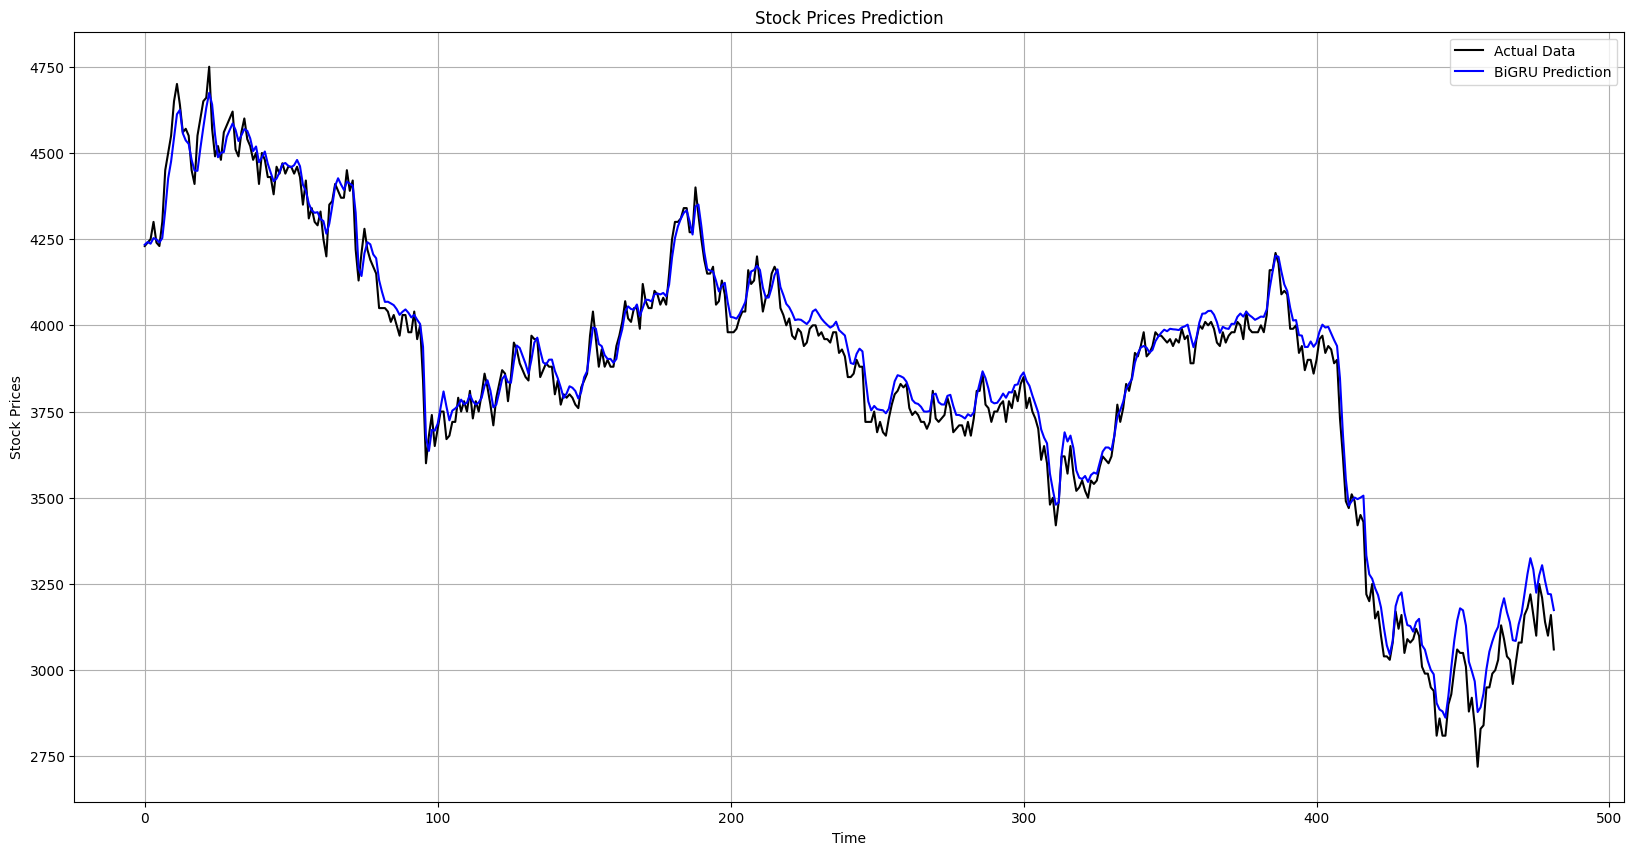

In [ ]:

plt.figure(figsize=(20, 10))
plt.plot(test_df['Close'], 'black', label='Actual Data')
plt.plot(preds_BiGRU_df['Close'], 'blue', label='BiGRU Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Prices Prediction')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_df['Open'], 'black', label='Actual Data')
plt.plot(preds_BiGRU_df['Open'], 'blue', label='BiGRU Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Prices Prediction')
plt.grid(True)
plt.legend()
plt.show()

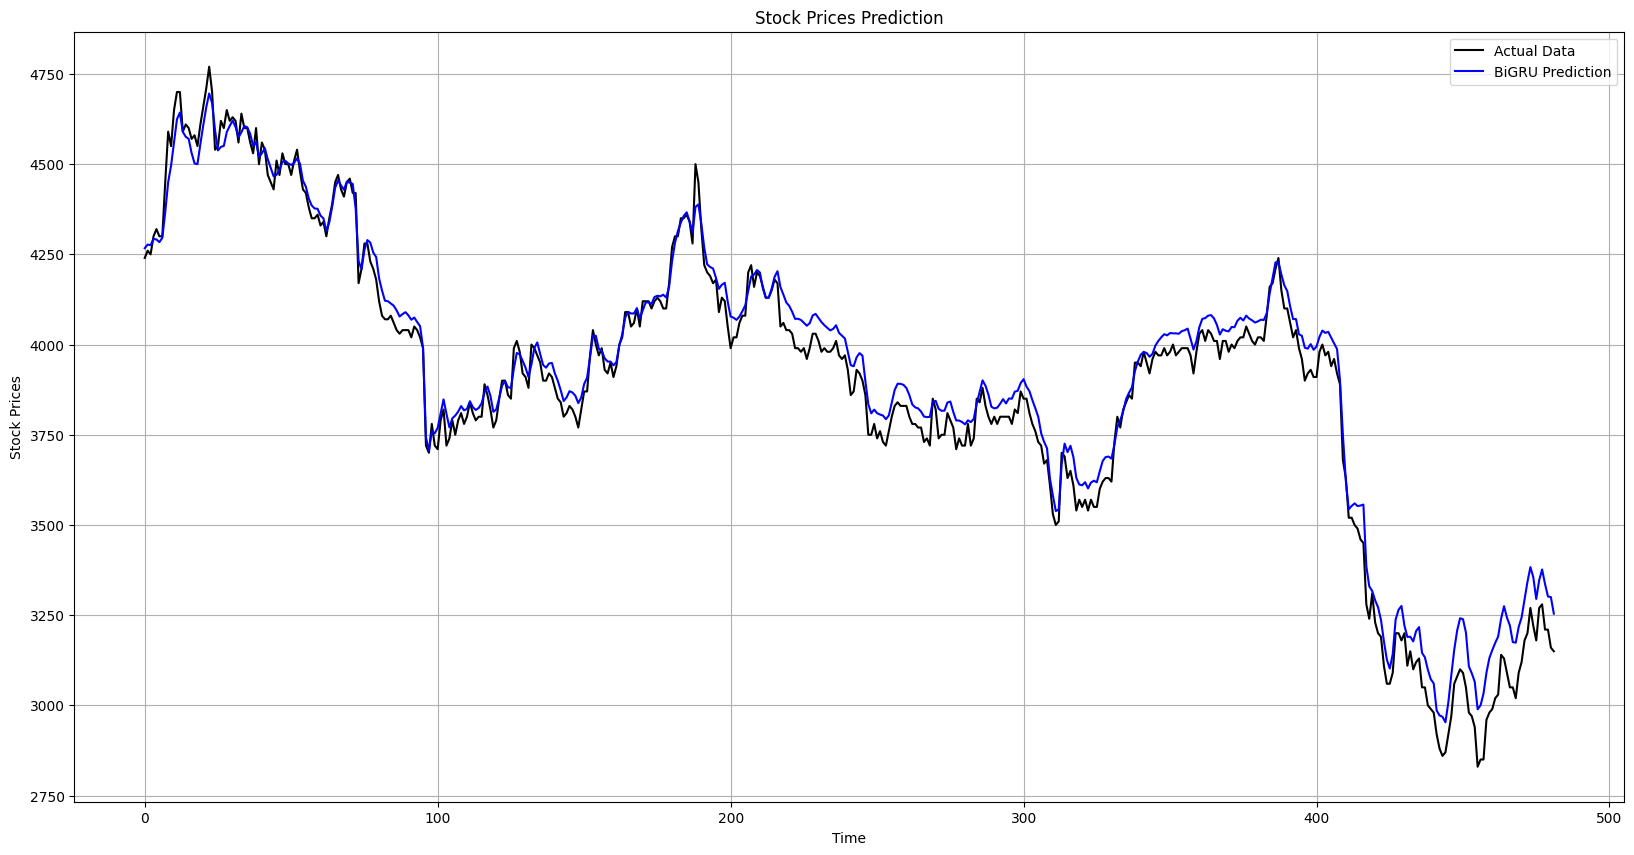

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_df['High'], 'black', label='Actual Data')
plt.plot(preds_BiGRU_df['High'], 'blue', label='BiGRU Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Prices Prediction')
plt.grid(True)
plt.legend()
plt.show()

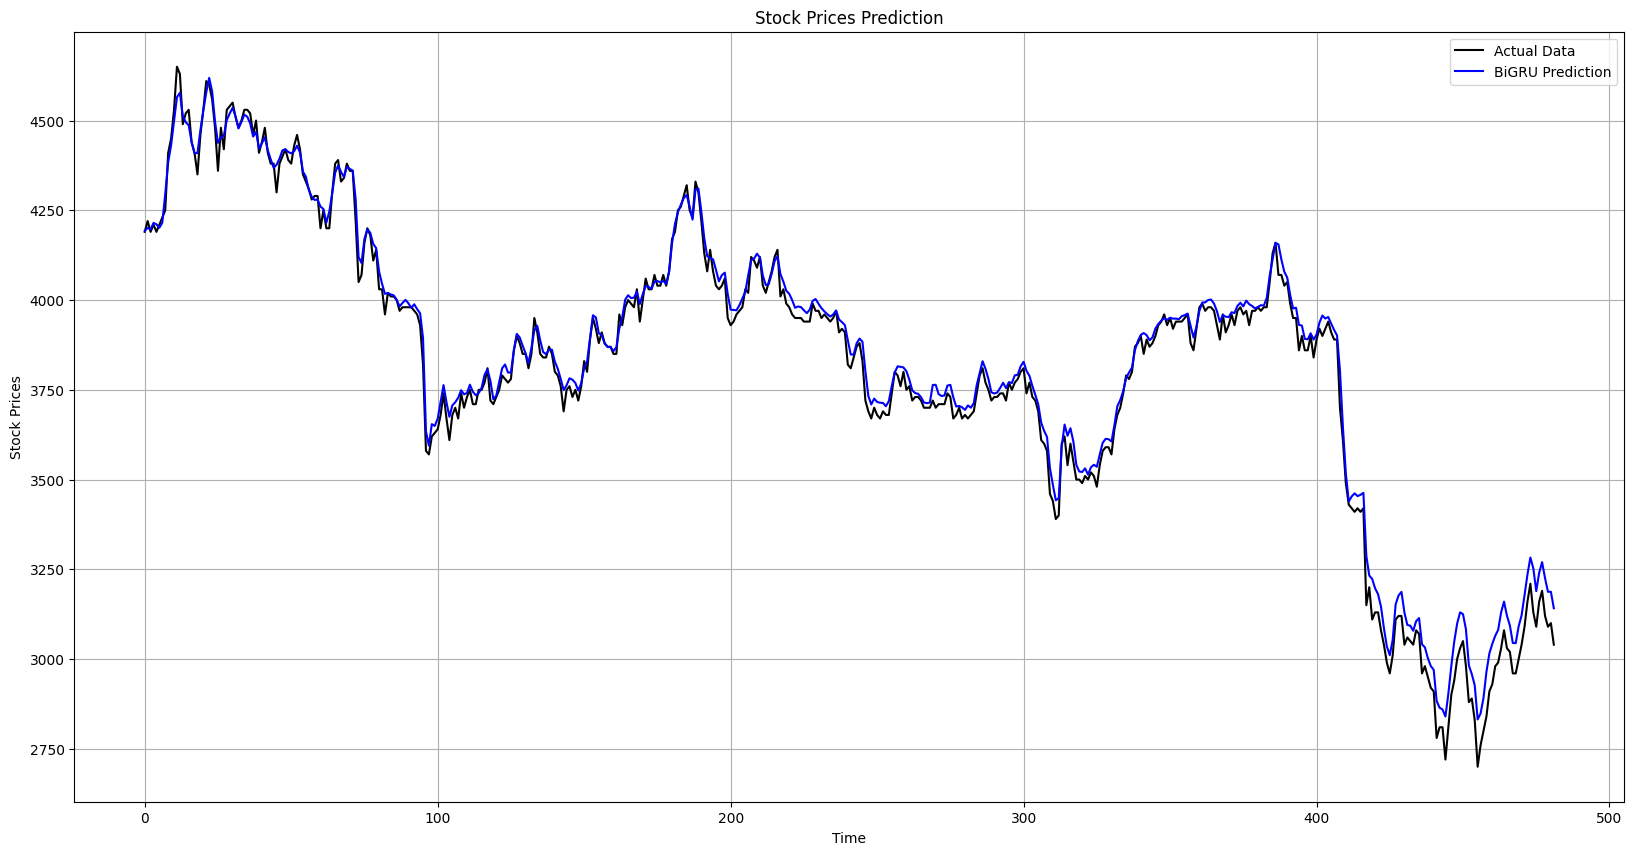

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_df['Low'], 'black', label='Actual Data')
plt.plot(preds_BiGRU_df['Low'], 'blue', label='BiGRU Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Prices Prediction')
plt.grid(True)
plt.legend()
plt.show()

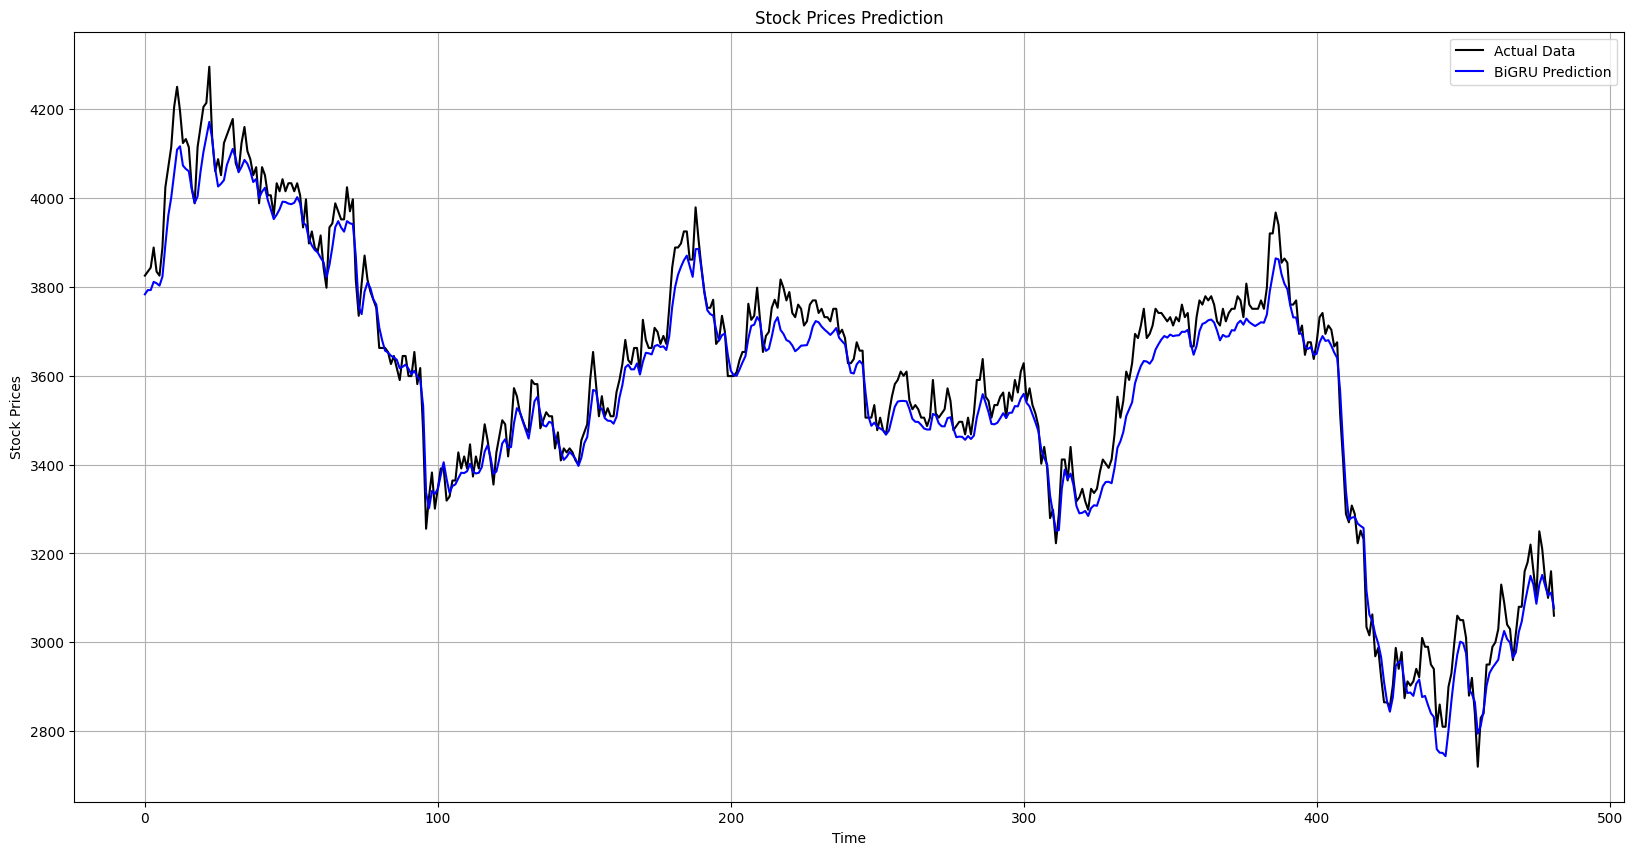

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_df['Adj Close'], 'black', label='Actual Data')
plt.plot(preds_BiGRU_df['Adj Close'], 'blue', label='BiGRU Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Prices Prediction')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Gunakan model untuk memprediksi
predictions = loaded_model_BiGRU.predict(test_X)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
